### University of Michigan - ROB 101 Computational Linear Algebra

# Project 3: Balancing a Segway via Optimization (20 Points)

## Due date is posted on Canvas. Projects are accepted late with a 15% per day penalty, pro-rated hourly. If you are 30 hours late, your penalty is (30/24)*15%. 

**Welcome to the world of feedback control and dynamical models:**
This project will allow you to experience the power of arg min when applied to things that move and go bump in the night! You will solve **ordinary differential equations (ODEs for short)**, using numerical techniques. What, you haven't completed Math 216? Actually we hope not! We want to give you a glimpse into what F=ma means when applied to mobile robots. We'll keep it simple and have our robots only move along a line. The mathematical representations of our robots will have from two to four variables in them. 

## It is assumed that you have read, and for the most part, understood, the Project 3 PDF before starting this notebook. If at some point you get stuck, go back to the PDF or study Chapters 9.8, 9.9, and 9.10 in our textbook.

## Chapter 9 of the Lab Manual works a problem similar to this project. Take a look.

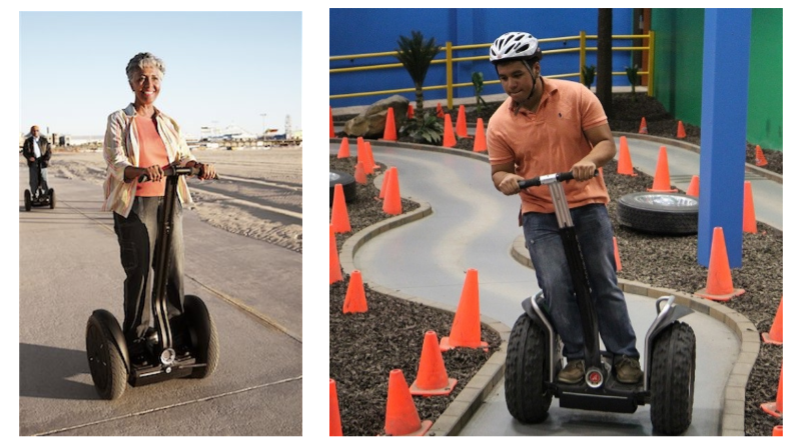




## Honor code: 
* You can ask general questions on Piazza
* If your notebook is hung up for some reason, you can definitely let us know on Piazza. 
* You can ask specific questions only in a breakout room during office hours
* Do not post any code, answers, or images on Piazza. 
* Do not work with other human beings with the exception of an IA, GSI, or professor of the course. 
* By submitting this project, you are attesting that it represents your own work and not the work of anyone else, with the exception of any assistance provided in office hours by an IA, GSI, or professor of ROB 101. 

## The questions before Yoda are not graded. You can post publicly to get help on them. After that, no posting except in private posts.

In [ ]:
using LinearAlgebra
using Plots
gr()

In [ ]:
# Run me. Don't change me. Cooking up some spicy friendly checks
using Random

function sample_emoji(verdict)
    happy = ["😊", "🤗", "🤩", "😁", "🥳", "😀", "😎", "😄"]
    sad = ["🥺", "😭", "🙄", "😒", "😩", "😥", "🥴", "😞"]
    if verdict == "Yes"
        emoji = happy[rand(1:length(happy))]
    else
        emoji = sad[rand(1:length(sad))]
    end
    return emoji
end

macro friendly_check(checknum, condition)
    cond = eval(condition)
    verdict = cond ? "Yes" : "No"
    emoji = sample_emoji(verdict)
    if cond
        printstyled("is_it_correct_check$checknum = $(verdict*emoji)\n";color=:blue)
    else
        printstyled("is_it_correct_check$checknum = $(verdict*emoji)\n";color=:red)
    end
end

## Basic functions for solving an underdetermined system via least squares
$$\Large x^\ast = \underset{x \in \mathbb{R}^m, Ax=b}{{\rm arg~~ min}~~~ x^\top x} $$


In [ ]:
# Run me, don't change me. 
# The QR pipeline for minimum norm solution of Ax=b when
# the ROWS of A are linearly independent 
# (yes, the columns of A' are linearly independent)

function forwardsub(L, b)    
    (nr,nc) = size(L)
    x = Vector{Float64}(undef,nc)
    if minimum(abs.(diag(L))) < 1e-8
        println("L is close to singular. I will not solve this problem")
        return x
    else    
        x[1] = b[1] / L[1,1]
        for i = 2:nc
            x[i]=( b[i] - L[i,1:i-1]' * x[1:i-1] ) / L[i,i]
        end
        return x  
    end
end

function minNormUnderdetermined(A,b)
    # Solves for minimum norm x in Ax = b 
    # using the QR factorization and forward substitution. Returns xStar.
    # xStar = arg min x' x
    #  subject to  Ax = b
    F = qr(A')
    Q = Matrix(F.Q)
    R = Matrix(F.R)
    beta = forwardsub(R', b) 
    xStar =Q*beta
    return xStar
end


# We are now going to test if you have a working knowledge of minimum norm solutions to underdetermined equations. Do not continue until you pass these tests. All of the relevant material is covered in Chapters 9.8, 9.9 and 9.10 of our ROB 101 textbook and Chapter 9 of the Lab Manual.

## If you have trouble with indexing (aka, slicing) a matrix, see Chapters 2.3, 2.4, and 2.5 in the Lab Manual. Recall that if A is a matrix, then A[i,:] extracts the i-th row but turns it into a column, while A[i:i, :] maintains the row nature of the data. 


In [ ]:
# Run me, don't change me. 
# Matrices and vectors for setting up a PRACTICE underdetermined least-squares problem
#
using Random
Random.seed!(7788996633);
M=randn(7, 20) 
y=randn(7)
println("M is a stand-in for the matrix M = [A^(k-1)*B A^(k-2)*B ... A*B B] in the MPC algorithm")
println("y is a stand-in for the quantity xGoal-S*xk in the MPC algorithm")
println(" ")
println("If you do not understand what the above means, then you have not read the recommended material.")

## Solve each of the following least squares problems. Write the required code calling the function  minNormUnderdetermined (A,b)  and then run the "friendly test" cells

##  The function minNormUnderdetermined(M,y) solves 

$$\Large uControl = \underset{u \in \mathbb{R}^k, Mu = y}{{\rm arg~~ min}~~~ u^\top u } \\
$$

## This first part is worth zero points. It's really checking that you are ready to start the actual project. If you have difficulties with this warm up part of the project, please reach out to your friendly ROB 101 Staff for help! We will be very happy to work with you.

In [ ]:
# Compute uControl01 = minimum norm squared solution of M*u = y
# where M and y are as defined two cells above this one.
# We are checking uControl01 so you need to use that name for the least squares solution

# uControl01 = ??
uControl01

In [ ]:
# friendly check
# if the value of is_it_correct_checkN is "Yes", then your answer may be correct. 
# If the value of is_it_correct_checkN is "No", then your answer is wrong

uControl01Answer=[ 
 -0.029338032089417192
  0.2482911077422758
  0.0751630246057179
  0.03460720143345631
 -0.15487451392404694
 -0.23879208531773616
 -0.11885323625769315
 -0.23060543278010437
 -0.13593067432494332
  0.5555465443821624
 -0.10369835782160328
  0.14243547225322664
  0.3275373188562154
  0.06831384805355326
  0.7010199066074131
 -0.15825677255970813
  0.1784177733068888
 -0.04101662321436017
 -0.49647854866278024
 -0.039438089432861272] 

@friendly_check 1 isapprox(norm(uControl01Answer-uControl01), 0.0, atol = 1e-3) 


In [ ]:
# Compute uControl02 = minimum norm squared solution of M2*u = y2
# where M2 and y2 represent row 1 of the equation M*u = y.
#
# You can use indexing to define M2 and y2 
# or you can define a matrix C2 such that 
# M2 = C2*M and y2=C2*y
#
# Either way, compute uControl02
#
# M2 =
# y2 =
# uControl02 = ??
uControl02

In [ ]:
# friendly check
# if the value of is_it_correct_checkN is "Yes", then your answer may be correct. 
# If the value of is_it_correct_checkN is "No", then your answer is wrong

uControl02Answer=[
  0.10474278241092547
 -0.01448320251588833
 -0.09342608456216525
  0.07214792799863036
 -0.05958262686218844
  0.021330454085592348
 -0.05235692903445293
 -0.03189443781247176
 -0.01761849864194859
 -0.01627334607915404
  0.07811944387729756
  0.024672177532659042
 -0.027098259743563648
 -0.005900704017698739
  0.09548301170637385
 -0.1068534815311583
  0.05650055723651308
  0.015035302352510053
 -0.003326440207646708
 -0.1480106569110949 ] 

nRows, nCols = size(M2)
Leny2=length(y2)

@friendly_check 1 isapprox(norm(uControl02Answer-uControl02), 0.0, atol = 1e-3)   
@friendly_check 2 isapprox(norm([nRows, nCols]-[1, 20]), 0.0, atol = 1e-3)  
@friendly_check 3 isapprox(Leny2-1, 0, atol = 1e-3) 



In [ ]:
# Compute uControl03 = minimum norm squared solution of M3*u = y3
# where M3 and y3 represent rows 2,4,6, and 7 of the equation M*u = y.
#
# You can use indexing to define M3 and y3 
# or you can define a matrix C3 such that 
# M3 = C3*M and y3=C3*y
#
# You are likely to find Chapter 2.5 in the Lab Manual useful here. 
#
# Whatever your method, compute uControl03
#
# M3 =
# y3 =
# uControl03 = ??
uControl03

In [ ]:
# friendly check
# if the value of is_it_correct_checkN is "Yes", then your answer may be correct. 
# If the value of is_it_correct_checkN is "No", then your answer is wrong

uControl03Answer=[
  0.032339911978215355
  0.14429221057741223
  0.18885123407036952
 -0.13085813475343355
 -0.15947074137074355
 -0.1956643695693898
 -0.11532751256371847
 -0.09842448489490245
  0.07676708592488898
  0.7033835464112914
  0.08038527824293035
  0.17585319686470433
  0.17529045622288653
 -0.07746420537363097
  0.4561358197370291
  0.08391028341156502
  0.1355739005425923
 -0.049453258778612126
 -0.37696104986201323
  0.06763631247796516 ] 

nRows, nCols = size(M3)
Leny3=length(y3)

@friendly_check 1 isapprox(norm(uControl03Answer-uControl03), 0.0, atol = 1e-3) 
@friendly_check 2 isapprox(norm([nRows, nCols]-[4, 20]), 0.0, atol = 1e-3)  
@friendly_check 3 isapprox(Leny3-4, 0, atol = 1e-3) 


In [ ]:
# # You can skip this if you want. Uncomment to run it.
# # A bit of added insight
# # 
# # M uControl = y is called an equality constraint on uControl
# #
# # We are solving minmize ||uControl||^2 subject to M uControl = y
# #
# cost1 = uControl01Answer'*uControl01Answer
# cost2 = uControl02Answer'*uControl02Answer
# cost3 = uControl03Answer'*uControl03Answer

# println("Problem 01 used all 7 constraints and the norm of u-squared is $cost1")
# println("Problem 03 used 4 of the 7 constraints and the norm of u-squared is $cost3")
# println("Problem 02 used only 1 constraint and the norm of u-squared is $cost2")
# println(" ")
# println("With fewer constraints, the least squares problem has more freedom to find a lower minimum value.")

### We next modify the previous problem so that we choose $u\in\mathbb{R}^{20}$ of minimum norm squared such that $M_3 u_{\rm Control4} = myGoal - y_3$, that is $$uControl4 = \underset{u \in \mathbb{R}^{20}, M_3 u = myGoal - y_3}{{\rm arg~~ min}~~~ u^\top u }, $$ where $$myGoal =  \begin{bmatrix}x_2 ^{\rm Goal} \\ x_4^{\rm Goal} \\ x_6^{\rm Goal} \\ x_7^{\rm Goal}\end{bmatrix} = \begin{bmatrix}\pi \\ \sqrt{3} \\ 0.25 \\ 0.00\end{bmatrix}. $$

## Roughly speaking, this means that for $y\in \mathbb{R}^{7}$, we are setting goals for four of its components and ignoring the other three.

## Later, depending on xGoal, you will have to select all of the state components of $x_k$ to be controlled to a goal value or you will have to select a subset of the state components of $x_k$ to be controlled to a goal value. You will know by the size of xGoal and the name of its components. 


In [ ]:
# Compute uControl04 = minimum norm squared solution of M3*u = myGoal - y3
# where as in the previous problem, M3 and y3 represent rows 2,4,6, 
# and 7 of the equation M*u = y, and 
#
myGoal = [pi, sqrt(3.0), 0.25, 0.00]
#

# Compute uControl04

# uControl04 = ??
uControl04

In [ ]:
# friendly check

uControl04Answer=[
  0.010316956198634724
 -0.4757696518875055
 -0.3856017221903121
  0.055502954836154424
  0.27126933192898717
  0.36454776798728533
  0.19102843258311267
  0.2938719249610828
 -0.3193409967710263
 -1.1174740704958348
 -0.2791286431198896
 -0.31403943725107464
 -0.166464273462741
  0.17434846233192797
 -0.8175313560413842
 -0.14531869451812146
 -0.4416187746939431
  0.027538319401455607
  0.777303953041584
 -0.3045393462851049 ] 


if norm(uControl04Answer-uControl04) < 1e-3
    println("You are ready to tackle Project 3. Congratulations!")
    println(" ")
    println("When you face a control problem where the Goal does NOT include")
    println("the position of the cart or the Segway, do not forget the above problem.")
else
    println("Keep at it. You want to get this correct before you move on.")
end

# If you have passed the above tests, 
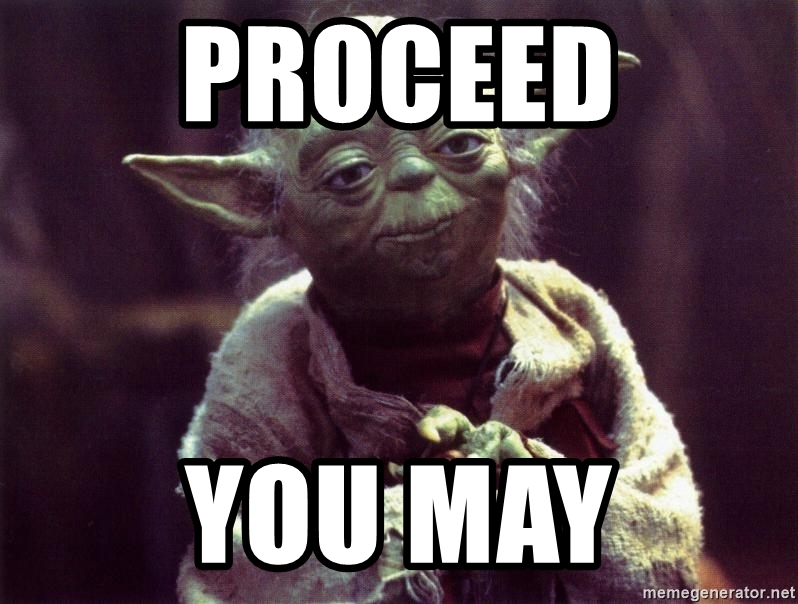
# you are ready to do the project! Congratulations!




## The Honor code applies to the remainder of the project: 
* You can ask general questions on Piazza
* If your notebook is hung up for some reason, you can definitely let us know on Piazza. 
* You can ask specific questions only in a breakout room during office hours
* Do not post any code, answers, or images on Piazza. 
* Do not work with other human beings with the exception of an IA, GSI, or professor of the course. 
* By submitting this project, you are attesting that it represents your own work and not the work of anyone else, with the exception of any assistance provided in office hours by an IA, GSI, or professor of ROB 101. 

## Functions that we are providing so that you can perform a computer simulation of a cart and a Segway. There is nothing to turn in here. It is worth looking through the functions. Our mathematical models of the cart and Segway will be expressed in the form 
$$x_{k+1} = A x_k + B u_k $$ 
## Because you have dealt with iterative methods for solving equations (root finding, optimization), we hope that you will find a mathematical model in the form of an iteration rather natural! And if not, models of the form $x_{k+1} = A x_k + B u_k$ are covered in Chapter 9 of the Lab Manual!!

In [ ]:
# Run me, don't change me. 
# Functions for simulating discrete-time
# versions of ODEs. These will be used for a cart and for 
# a Segway

function simModelNomOpenLoop(A,B,x0,u)
    # given x0 and a control sequence u
    # compute the resulting trajectory
    # for k = 0:length(u)
    # using a perfect model 
    # Assume u is a vector and not a 2d array
    (rA,cA) = size(A)
    xTraj = Array{Float64,2}(undef,rA,0)
    N = length(u)
    xTraj=[xTraj x0]
    for k = 1:N
        xk = xTraj[:,k]
        uk = u[k]
        xkp1 = A*xk+B*uk
        xTraj = [xTraj xkp1]          
    end
    return xTraj
end

function xkPlus1DisturbedCart(A,B,xk,uk,dt)
    # Introduce disturbances that make perfect predictions 
    # not work in engineering practice
    (rA,cA) = size(A)
    Anom=A
    d=0.1
    Amud=A+dt*[0 0;0 -d]
    Awind=A+dt*[0 0;0 2*d]
    xkp1 = Array{Float64,2}(undef,rA,1)
    for k = 1:N
        if  abs(xk[1]-3)<1
            xkp1 = Amud*xk+B*uk            
        elseif abs(xk[1]-11)<0.6
            xkp1 = Awind*xk+B*uk
        else
            xkp1 = Anom*xk+B*uk
        end    
    end
    return xkp1
end

function xkPlus1DisturbedSegway(A,B,xk,uk,dt)
    # Introduce disturbances that make perfect predictions 
    # not work in engineering practice
    (rA,cA) = size(A)
    d=0.1
    Anom=A
    Dmud=zeros(rA,cA); Dmud[rA,rA]=-d
    Amud=A+dt*Dmud
    Dwind=zeros(rA,cA); Dwind[rA,rA]=2*d
    Awind=A+dt*Dwind
    xkp1 = Array{Float64,2}(undef,rA,1)
    for k = 1:N
        if  abs(xk[2]-10)<1
            xkp1 = Amud*xk+B*uk            
        elseif abs(xk[2]-3)<1.5
            xkp1 = Awind*xk+B*uk
        else
            xkp1 = Anom*xk+B*uk
        end    
    end
    return xkp1
end

function xkPlus1Disturbed(A,B,xk,uk,dt)
    # Introduce disturbances that make perfect predictions 
    # not work in engineering practice
    (rA,cA) = size(A)
    if rA==2
         xkp1 = xkPlus1DisturbedCart(A,B,xk,uk,dt)
    else
        xkp1 = xkPlus1DisturbedSegway(A,B,xk,uk,dt)
    end
    return  xkp1   
end

function simModelDisturbedOpenLoop(A,B,x0,u)
    # given x0 and a control sequence u
    # compute the resulting trajectory
    # for k = 0:length(u)
    # when the model has unexpected deviations 
    # from its nominal behavior!
    # Assume u is a vector and not a 2d array
    dt=0.1
    (rA,cA) = size(A)
    xTraj = Array{Float64,2}(undef,rA,0)
    N = length(u)
    xTraj=[xTraj x0]
    for k = 1:N
        xk = xTraj[:,k]
        uk = u[k]
        xkp1 = xkPlus1Disturbed(A,B,xk,uk,dt)
        xTraj = [xTraj xkp1]          
    end
    return xTraj
end

# Cart Tasks: Overview (10 points total)
 

## Below is model for a simple cart moving along on line. It has two state variables, $x_1$ is the position of the cart and $x_2$ is the velocity (or speed) of the cart. When the model is expressed as $$x_{k+1} = A x_{k} + B u_{k} $$ you are to interpret $u_k$ as the force being applied to the cart's wheels at time $t_k = k ~dt$, where for us, $dt = 0.1$ seconds. The force could be generated by an electric motor, for example. To be extra clear, $x=\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$ and thus  $x_k=\begin{bmatrix} x_{k,1} \\ x_{k,2} \end{bmatrix} = \left[ \begin{array}{c}\text{cart poisition at time k} \\ \text{cart velocity at time k} \end{array}\right] $. 


## Your first goal will be to drive the cart from point A to point B by adjusting the applied force, $u_k$. Points A and B will be known to you. How hard can that be? When the world is benign, we will see that it is quite simple. 

## In subsequent tasks, however, the world in which your cart moves will be full of hazards that will attempt to prevent your cart from arriving at point B. You will practice on hazards that include mud, which will slow down your cart and cause it to come up short of its goal, that is, point B, and a tailwind, which will cause your cart to overshoot its goal. We will grade you on how closely you attain the goal AND how efficiently you use the cart's energy source in your effort to reach the goal!

## We first do some simple tasks for you as a kind of warm-up. Then we'll turn your loose.

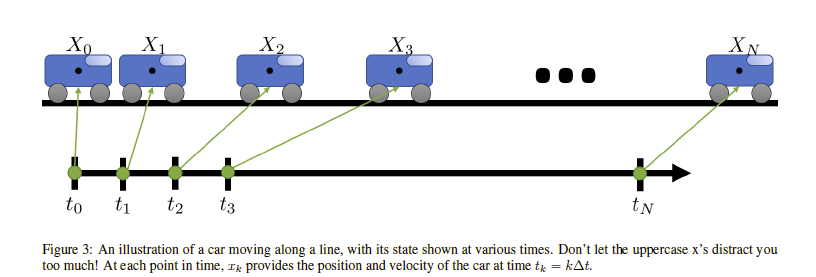

In [ ]:
# Run me, don't change me. 
# Functions defining the dynamics of a cart.
# An example of how to call it is given just after the function
# definition. It has no arguments and returns matrices A and B.
function cartModel()
    # kp1 means k + 1
    # xkp1 = A xk + B uk
    dt = 0.1 # assumed value
    A = [1.0 dt; 0.0 1.0]
    B = [0.0; dt]
    return A, B
end
(A,B)=cartModel()
(nr,nc) = size(A)

# Cart Task 1 (2 points) Find an input sequence u of length 20 seconds that drives the cart from Point A, defined to be the cart at rest at the origin, to Point B, defined as the cart at rest 15 meters to the right of the origin.

In [ ]:
# Run me, don't change me. Read each and every line 
x0=[0;0] #Point A
xGoal = [15; 0] # Point B
#
dt=0.1
(A,B)=cartModel()
(nr,nc) = size(A)
N = 200; # 20/dt, where dt = 0.1 seconds

In [ ]:
# Run me and understand very well what I am doing. There is nothing to change
#
# Open loop control computation
S=A^N
M=Array{Float64,2}(undef,nr,0)
for k=1:N
    M=[A*M B]
end
#For why this is the correct call, see the Project 3 PDF or Chapter 9.10 of our textbook 
uControl=minNormUnderdetermined(M,xGoal-S*x0)
#
# nominal open-loop sim
xTrajNom=simModelNomOpenLoop(A,B,x0,uControl)  #Nom is short for NOMINAL, meaning, the world is kind and the cart 
                                               #does not encounter ``disturbances'' such as mud, tailwinds, etc. 
#
# We'll make some plots for you
titre="Cart"
t=(1:N)*dt
p1=scatter(t,uControl,legend=false, title=titre, color=:black )
xlabel!("Time (sec)");ylabel!("Control Input Vector")
plot!(t,0.0*uControl,linewidth=2, color=:black)
display(p1)
p2=scatter(xTrajNom[1,:], xTrajNom[2,:], title=titre, color=:orange, label = "Open-loop, no disturbances", legend=:bottom)
xlabel!("x1 (m)");ylabel!("x2 (m/sec)"); # units are meters and meters per second
display(p2)
#png(p2, "Cart in Open Loop") 
@show norm(uControl)^2
println(" ")
println("We reached our goal.")
@show norm(xGoal-xTrajNom[:,end])
println(" ")
println("The top plot is the control signal you computed to drive the cart from")
println("being at rest (=not moving) at the origin (=0) to being at rest, 15 meters")
println("down the road. The second plot shows how the cart's speed varies")
println("as a function of the position of the cart. It's not so interesting now.")
println("You will see this curve change a lot when the cart encounters perturbations.")


### Interpretation: We computed an input sequence of minimum norm squared that drives the cart from Point A to Point B. We started at zero velocity, we ended with zero velocity, and we reached a peak velocity of roughly 1 m/sec at the midpoint of our trip. 

## We reached our goal with infinitesimal error. Our energy cost was $u^\top u = norm(u)^2 =$ 3.38. 

## When one computes an input sequence and does not update it as a function of the state trajectory of a model, it is called open-loop control (see the handout). When the world is nice, open-loop control works remarkably well as we just saw. We will now use the same open-loop input sequence and see how it works when the world is less benign! 

In [ ]:
# simulate open-loop controller when the cart encounters unexpected disturbances, like mud or wind
# yes, your cart must function in an unfriendly world!
#
xTrajDist = simModelDisturbedOpenLoop(A,B,x0,uControl)
#
titre="Evaluation in a Less Perfect World"
p3=scatter(xTrajNom[1,:], xTrajNom[2,:], title=titre, color=:orange, label = "Open-loop, no disturbances", legend=:bottom)
scatter!(xTrajDist[1,:], xTrajDist[2,:], title=titre, color=:blue, label = "Open-Loop, with disturbances", legend=:bottom)
xlabel!("cart position x1 (m)");ylabel!("cart velocity x2 (m/sec)"); # units are meters and meters per second
display(p3)
png(p3, "Cart vs Disturbances") 
@show norm(uControl)^2
@show norm(xGoal-xTrajNom[:,end])
println(" ")
println("The blue line does not terminate at our goal; we failed to reach it by 1.6 meters.")
println(" ")
println("That did not work out so well. Look how badly we missed Point B!")
@show norm(xGoal-xTrajDist[:,end]);

In [ ]:
# Run me dont change me, I will animate the cart simulation.
# Play the video when it is complete.
plot()
anim = @animate for i = 1:size(xTrajNom,2)
    scatter([xTrajNom[1,i]], [4.0], ylim = (0,8), xlim = (0,17), markershape = :rect, markersize = 20, color=:orange,label = "Open-loop, no disturbances", aspect_ratio = :equal )
    scatter!([xTrajDist[1,i]], [1.0], markershape = :rect, markersize = 20, color=:blue, label = "Open-Loop, with disturbances" ,aspect_ratio = :equal)
    scatter!([xTrajNom[1,i]+0.4 xTrajNom[1,i]-0.4 xTrajDist[1,i]+0.4 xTrajDist[1,i]-0.4], [3.2 3.2 0.2 .2], markershape = :circle, markersize = 7, color = :yellow, label = "")
    plot!([0;25],[3.0;3.0], color = :black, label = "", title = "Carts in different worlds at 2x")
end
gif(anim, "simple_cart_dist.mp4", fps = 20)

# The above is the equivalent of driving blindfolded, so it's not suprising that the outcome is less than desirable. 

## When we drive a car, we observe our progress and adjust the gas pedal and brake to keep us on track to our goal. When a system does that by itself (that is, autonomously), it is using feedback control. 

## If we want our cart to respond correctly so that it achieves its goal in the face of disturbances, we cannot keep on applying our original control sequence. Instead, we need to re-compute the applied force at time $t_k=kdt$ as a function of our position and velocity at time k and how we are doing with respect to our goal (position and time). That is, we want uk to be a function of xk, our goal, xGoal, and  how much time we have left to achieve our goal, $\Delta T = (N-k)*dt$. Adjusting the applied force as a function of your current state measurements and goal is called feedback control, or closed-loop control. When you just compute a value ahead of time and never update it on the basis of your progress (or lack thereof) to a goal, it is called open-loop control.

## When we recompute the input on the basis of optimization (such as least squares) and a model of our system (that is, a model of our cart), the resulting form of feedback is called Model Predictive Control, or MPC for short. We now show you how much better we can drive the cart with MPC.

# You need to study the following code block so that you can answer questions about what it is doing

In [ ]:
# Read the following code so that you can answer questions about what each function is doing. This may be easier
# after you execute the code two cells from now
#
function myCartMPC(A,B,xk,k,N,xGoal)
    # xk is the current position and velocity of the cart
    # k is the time index. Hence, tk = k dt
    # N is the total amount of time we were given to reach xGoal
    # Hence, N-k is the time left
    (nr,nc) = size(A)
    nControlHoriz=max(N-k,3)  # Receeding Horizon, MPC
    S=A^nControlHoriz
    M=Array{Float64,2}(undef,nr,0)
    for i=1:nControlHoriz
        M=[A*M B]
    end
    uControl=minNormUnderdetermined(M,xGoal-S*xk)
    uk=uControl[1]
    return uk
end

#
function simCartMPC(x0,dt,N,xGoal)
    (A,B) = cartModel()
    (rA,cA) = size(A)
    N=1+N # because x0 is included
    xTraj = Array{Float64,2}(undef,rA,0)
    uTraj = Array{Float64,2}(undef,1,0)
    xTraj=[xTraj x0]
    for k = 1:N
        xk=xTraj[:,k]
        uk=myCartMPC(A,B,xk,k,N,xGoal)
        uTraj=[uTraj uk]
        xkp1 = xkPlus1Disturbed(A,B,xk,uk,dt)
        xTraj = [xTraj xkp1]          
    end
    return xTraj, uTraj
end


In [ ]:
# run me don't change me. My output may help you to understand
# what the two functions 
# function myCartMPC(xk,k,N,xGoal)
# and
# function simCartMPC(A,B,x0,dt,N)
# are accomplishing
#
(xTrajMPC, uTrajMPC) = simCartMPC(x0,dt,N,xGoal)
titre="The Power of Feedback Control"
p4=scatter(xTrajNom[1,:], xTrajNom[2,:], title=titre, color=:orange, label = "Open-loop, no disturbances", legend=:bottom)
scatter!(xTrajDist[1,:], xTrajDist[2,:], title=titre, color=:blue, label = "Open-Loop, with disturbances", legend=:bottom)
scatter!(xTrajMPC[1,:], xTrajMPC[2,:], title=titre, color=:red, label = "Closed-loop Control MPC battling the disturbances", legend=:bottom )
xlabel!("x1 (m)");ylabel!("x2 (m/sec)"); # units are meters and meters per second
display(p4)
png(p4, "Cart vs Disturbances") 
println("We achieve our goal perfectly using open-loop control when the world is benign and does not fight against us")
@show norm(xGoal-xTrajNom[:,end])
println(" ")
println("We fail to achieve our goal when using open-loop control in the real world")
@show norm(xGoal-xTrajDist[:,end])
println(" ")
println("Feedback control allows us to more nearly achieve our goal in the real world")
@show norm(xGoal-xTrajMPC[:,end])
println("Wow!  We nailed it. The error is a small fraction of a millimeter.")
println(" ")
println(" ")
println("This was our consumed energy in a perfectly nice world")
@show norm(uControl)^2
println("This is our consumed energy in an imperfect world")
@show norm(uTrajMPC)^2
println(" ")
println("Typically, there is a trade off between `control effort and energy' vs how accurately we achieve our objectives.")
println(" ")
println("Here, we are vastly closer to our goal with a modest increase in control effort. That is an acceptable tradeoff.")

## You will answer these four T/F questions in the next cell. Each is worth 0.5 points.

Q1. In the function myCartMPC, $$ uk = \underset{u \in \mathbb{R}^k, Mu = y}{{\rm arg~~ min}~~~ u^\top u },$$ 

where $M=\left[\begin{array}{ccccc} A^{k-1}\cdot B &  A^{k-2}\cdot B & \cdots & A\cdot B & B \end{array}\right]$ and $y=xGoal-A^k ~xk$

Q2. In the function myCartMPC, $ uk = u_{seq}[1]$, where $$u_{seq} = \underset{u \in \mathbb{R}^k, Mu = y}{{\rm arg~~ min}~~~ u^\top u }, 
$$ 

and where $M=\left[\begin{array}{ccccc} A^{n-1}\cdot B &  A^{n-2}\cdot B & \cdots & A\cdot B & B \end{array}\right]$, $y=xGoal-A^{n} xk$, and $n=nControlHoriz$.

Q3. In the function myCartMPC, $ uk = u_{seq}[1]$, where $$u_{seq} = \underset{u \in \mathbb{R}^k, Mu = y}{{\rm arg~~ min}~~~ u^\top u },$$

where $M=\left[\begin{array}{ccccc} A^{k-1}\cdot B &  A^{k-2}\cdot B & \cdots & A\cdot B & B \end{array}\right]$, and $y=xGoal-A^{n} xk$.

Q4. The function simCartMPC computes $x_k$ and $u_k$ for $0 \le k \le N$. That is 
$$
\begin{aligned}
xTraj & = \left[\begin{array}{ccccc} x_{0} & x_{1}& \cdots & x_{N-1} & x_{N} \end{array} \right]
\end{aligned}
$$
where
$$ x_k=\begin{bmatrix} x_{k,1} \\ x_{k,2} \end{bmatrix} = \begin{bmatrix} \text{position at time } k \\  \text{velocity at time } k\end{bmatrix}$$
and 
$$
\begin{aligned}
uTraj & = \left[\begin{array}{ccccc} u_{0} & u_{1}& \cdots & u_{N-1} & u_{N} \end{array} \right]
\end{aligned}
$$


In [ ]:
# Place your answers here by replacing ?? with true or false
# You cannot use zero and one in place of true and false in Julia
# Do not capitalize the variables true and false!

# For example, your answer should be either AnsQ1 = true or AnsQ1 = false

# Each answer is worth 0.5 points. 
# AnsQ1 = ??
# AnsQ2 = ??
# AnsQ3 = ??
# AnsQ4 = ??

if !( (typeof(AnsQ1) == Bool) & (typeof(AnsQ2) == Bool) & (typeof(AnsQ3) == Bool) & (typeof(AnsQ4) == Bool)  ) 
    println("At least one of your answers was not a boolean variable, that is, either true or false")
end

In [ ]:
# Run me don't change me, I will make a video for the cart simulation 
plot()
anim = @animate for i = 1:size(xTrajNom,2)
    scatter([xTrajNom[1,i]], [4.0], ylim = (0,11), xlim = (0,17), markershape = :rect, markersize = 20, color=:orange,label = "Open-loop, no disturbances", aspect_ratio = :equal )
    scatter!([xTrajDist[1,i]], [1.0], markershape = :rect, markersize = 20, color=:blue, label = "Open-Loop, with disturbances" ,aspect_ratio = :equal)
    scatter!([xTrajMPC[1,i]], [7.0], markershape = :rect, markersize = 20, color=:red, label = "Closed-loop Control:; MPC battling the disturbances" ,aspect_ratio = :equal)
    scatter!([xTrajNom[1,i]+0.4 xTrajNom[1,i]-0.4 xTrajDist[1,i]+0.4 xTrajDist[1,i]-0.4], [3.2 3.2 0.2 .2], markershape = :circle, markersize = 7, color = :yellow, label = "")
    scatter!([xTrajMPC[1,i]+0.4 xTrajMPC[1,i]-0.4], [6.2 6.2], markershape = :circle, markersize = 7, color = :yellow, label = "")
    plot!([0 0;25 25],[3.0 6.0;3.0 6.0], color = :black, label = "", title = "Carts in different worlds at 2x")
end
gif(anim, "simple_cart_MPC.mp4", fps = 20)

# Cart Task 2 (8 points): Speed Regulation

## You've seen the power of adjusting the applied force as a function of the position and velocity of the cart. In other words, you've seen first hand the power of feedback control. We will now change the goal and turn you loose to tune up your feedback controller. We will then evaluate it and score you on 
## a) How efficiently you use "energy" as measured by $ u^\top u = \sum_{i=1}^N (u_i)^2$ and 
## b) How closely you can follow a speed reference of 1 m/s while your cart encounters a range of disturbances. 

## Your new goal is to maintain a constant speed of 1 m/s. You do not care about position.

# Complete the code stub below for your new MPC-based controller. You will have to make decisions on the " time horizon" in the controller. That is, in the cell following this one, you must set the variable $$nControlHoriz$$ and you will have to set how the sequence $$uControl$$ is computed.

# It is suggested that you try several values for $nControlHoriz$ and simulate your cart and controller in an imperfect world. You can re-use the disturbances we applied to the cart previously, or you can invent new ones. We will grade you against a set of disturbances that will be hidden from you. Yes, you are playing a game against nature! You can adjust your controller's parameters as often as you wish! 

## Remark: In our evaluation tests of your controller, we will always start your cart from a speed of 0.9 m/s. The amount of time we run our tests will vary. 

## Remark: look for the lines

## #nControlHoriz = ?? 
##    and
## #uControl=minNormUnderdetermined(??,xGoal.-??) 

## These are the only changes you have to make. 

In [ ]:
# There are two places where you need to set values 
# Uncomment lines where you find the ?? (question marks), 
# complete the code for the controller and then test it in the next cells.


function myCartSpeedMPC(A,B,xk,xGoal)
    # xk is the current position and velocity of the cart
    # xGoal is the goal, which should be 1 m/s
    (nr,nc) = size(A)
    
    # make this a constant, between 2 and 60
    # nControlHoriz = ?? 
    
    ## Provided code
    nControlHoriz = minimum([maximum([nControlHoriz,2]),60]) # bounds nControlHoriz in case you did not follow instructions
    S=A^nControlHoriz
    M=Array{Float64,2}(undef,nr,0)
    for i=1:nControlHoriz
        M=[A*M B]
    end
    # To think about 
    # S*xk + M*uControl is the value of x at the end 
    # of your control horizon when the cart starts at xk and the input sequence
    # uControl is applied. S*xk + M*uControl has two components: position and speed
    # You only want to regulate one of them, the cart speed
    ## Provided code
    
    # uControl=minNormUnderdetermined(??,xGoal.-??)    
    
    uk=uControl[1]
    return uk
end

In [ ]:
# # Optional friendly test: Uncomment me if you want to run me. 
# # Select everything in the cell, hold down the Ctrl key and hit forward slash / 
# # and then set nControlHoriz = 3 in the function myCartSpeedMPC
# #
# (A,B) = cartModel()
# u=myCartSpeedMPC(A,B,[1;pi],0.0)

# if isapprox(u,-10.47, atol = 1e-1)
#     println("Your function seems to be correct")
#     println("Don't forget to reset your value of nControlHoriz to a better value")
# else 
#     println("In the function myCartSpeedMPC, you must set nControlHoriz = 3 or this test is not valid")
#     println("You failed the test. Did you set  nControlHoriz = 3? See above"); 
# end

In [ ]:
# Read the comments I contain and run me. If you have a problem running 
# a simulation, look elsewhere. It will not be my fault! 
#
function simCartSpeedMPC(x0,dt,N,xGoal)
    # x0 is the intial condition
    # dt is 0.1
    # N is the total number of time steps
    # xGoal is here so that yu can pass it to 
    # your controller. It is probabaly equal to the scalar 1.0
    (A,B) = cartModel()
    (rA,cA) = size(A)
    xTraj = Array{Float64,2}(undef,rA,0)
    uTraj = Array{Float64,2}(undef,1,0)
    xTraj=[xTraj x0]
    for k = 1:N
        xk=xTraj[:,k]
        uk=myCartSpeedMPC(A,B,xk,xGoal)
        uTraj=[uTraj uk]
        # You are free to update the function xkPlus1Disturbed if you want
        # to challenge yourself with different disturbances
        xkp1 = xkPlus1Disturbed(A,B,xk,uk,dt)
        # if you want to first test on a nominal (perfect model), then
        # uncomment the following line. 
        # xkp1 = A*xk + b*uk
        xTraj = [xTraj xkp1]          
    end
    return xTraj, uTraj
end

#### Below is code for testing your MPC controller. Keep adjusting your control horizon until you obtain 


##  Energy Score < 0.4
##  Speed Tracking Error Score < 0.8

## Achieving these values in the next test will set you up to pass the more difficult test for the autograder. 

## Intuition: A short control horizon will be very aggressive, and hence use a lot of Energy to accomplish the Speed Tracking Goal (yielding very good tracking). A long control horizon will be very gentle, and hence use a small amount Energy to accomplish the Speed Tracking Goal (yielding poor tracking). You need to balance these conflicting objectives.

In [ ]:
# Here is some code for testing. Keep adjusting your horizon until you meet the above objectives
#
x0=[0;1]
N=200
dt=0.1
xGoal=1
(xTrajMPC, uTrajMPC) = simCartSpeedMPC(x0,dt,N,xGoal)
titre="Speed Control"
t=(1:N)*dt
p5=scatter(t, uTrajMPC', title=titre, color=:orange, label = "Control Signal")
xlabel!("time (sec)");ylabel!("u[k] (N) SI units of Newtons");
t=(1:N+1)*dt
p6=scatter(t, xTrajMPC[2,:], ylim=(0, 2), title=titre, color=:red, label = "Cart Speed" )
xlabel!("time (sec)");ylabel!("x2 (m/sec)");
vRef=ones(N+1,1)
scatter!(t, vRef, title=titre, color=:blue, label = "Ref Speed" )
# xlabel!("t (sec)");ylabel!("x2 (m/sec)"); # units are meters and meters per second
display(p5)
display(p6)
ScoreEnergy = norm(uTrajMPC)^2
ScoreSpeedError = norm(xTrajMPC[2,:]-vRef)
println(" ")
println("Your energy score is $ScoreEnergy")
println("Your tracking accuracy score is $ScoreSpeedError")
println(" ")
if (ScoreEnergy<0.4)&(ScoreSpeedError<0.8); println("You passed!");else println("You fail. Re-tune your control horizon"); end

In [ ]:
# Run as is. You don't need to change anything
using Random
Random.seed!(4321);
function simCartSpeedMPCGrade(x0,dt,N,xGoal)
    # x0 is the intial condition
    # dt is 0.1
    # N is the total number of time steps
    # xGoal is here so that yu can pass it to 
    # your controller. It is probabaly equal to the scalar 1.0
    (A,B) = cartModel()
    (rA,cA) = size(A)
    xTraj = Array{Float64,2}(undef,rA,0)
    uTraj = Array{Float64,2}(undef,1,0)
    xTraj=[xTraj x0]
    t=0.0
    for k = 1:N
        xk=xTraj[:,k]
        uk=myCartSpeedMPC(A,B,xk,xGoal)
        uTraj=[uTraj uk]
        # You are free to update the function xkPlus1Disturbed if you want
        # to challenge yourself with different disturbances
        t=t+dt
        if abs(t-3.0)<1
           dk=-0.2 + 0.2*rand(1)[1]
        elseif abs(t-30)<1
            dk=0.2*rand(1)[1]
        elseif abs(t-20)<3
            dk=-0.3*rand(1)[1]
        elseif abs(t-70)<1
           dk=-0.2 + 0.2*rand(1)[1]
        else
            dk=0.0*rand(1)[1]
        end 
        #@show dk
        xkp1 = A*xk+B*uk+[0;.1*dk]
        # if you want to first test on a nominal (perfect model), then
        # uncomment the following line. 
        # xkp1 = A*xk + b*uk
        xTraj = [xTraj xkp1]          
    end
    return xTraj, uTraj
end
x0=[0;0.9]
N=1000
t=(1:N+1)*dt
xGoal=1
vRef=ones(N+1,1)
(xTrajMPC, uTrajMPC) = simCartSpeedMPCGrade(x0,dt,N,xGoal)
ScoreEnergy = norm(uTrajMPC)^2
ScoreSpeedError = norm(xTrajMPC[2,:]-vRef)
println(" ")
println("Your energy score is $ScoreEnergy")
println("Your tracking error score is $ScoreSpeedError")
println("To pass the autograder, you need your energy score less than 1.5 and your tracking score less than 1.85")
p6=scatter(t, xTrajMPC[2,:], title=titre, color=:red, label = "Cart Speed" )
xlabel!("time (sec)");ylabel!("x2 (m/sec)");
vRef=ones(N+1,1)
scatter!(t, vRef, title=titre, color=:blue, label = "Ref Speed" )
if (ScoreEnergy<1.5)&(ScoreSpeedError<1.85); println("You are likely to pass!");else println("You fail. Re-tune your control horizon"); end

#  Segway Overview (10 points total)

## We now begin the Segway portion of the project. Similar to the cart portion of the project, we will give you a mathematical model of the Segway and some tools for doing computer simulations. A real Segway is three-dimensonal and is modeled with nonlinear functions. Here, we are using a simplified model of a Segway, where it is constrained to roll along a line and where the nonlinear functions in its model have been replaced by their linear approximations (yes, just as we did when studying Newton-Raphson).


 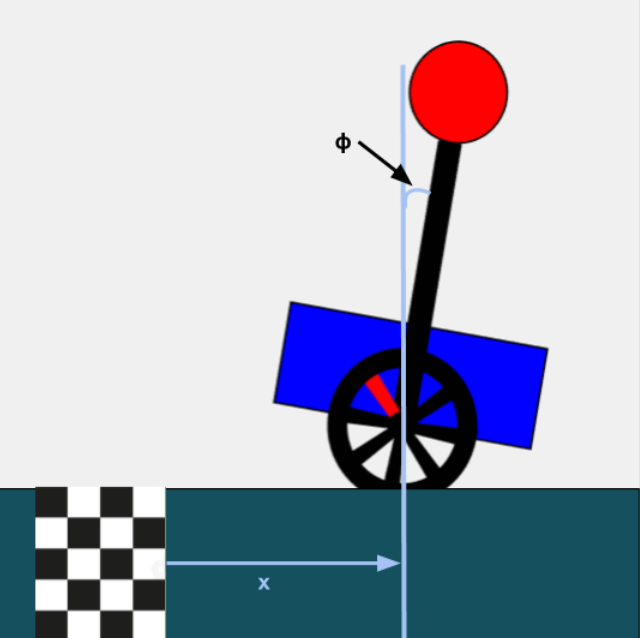

## Segway States: $$\left[\begin{array}{c} x_1 \\ x_2 \\x_3 \\x_4 \end{array} \right] = \left[\begin{array}{c}  \phi \\ x \\ \dot{\phi} \\\dot{x} \end{array} \right] = \left[\begin{array}{c}  \text{ lean angle of the pendulum } \\ \text{ horizontal position of the base } \\ \text{ angular velocity of the pendulum } \\ \text{ horizontal velocity of the base } \end{array} \right]$$


In [ ]:
# run me don't change me. I give you some model data for the Segway and 
# a basic open-loop simulator
function SegwayModel()
    #= Original model coorindates are phi=x(1);theta=x(2); dphi=x(3);dtheta=x(4); 
    phi = angle of Segway body, #theta = wheel rotation angle, hence lateral position
    = r (theta + phi),  where r = wheel radius; In the end, we are using center of mass (CoM)
    also called, center of gravity
    =#
    r=0.5
    # P=[1 0 0 0; r r 0 0; 0 0 1 0; 0 0 r r] #coordinate change for x position
    #
    P=[1 0 0 0; 1.2 0.5 0 0; 0 0 1 0; 0 0 1.2 0.5]  # coordinate change for x-CoM
    Ac = [0 0 1 0; 0 0 0 1; 2.568 0 0 0; -5.020  0 0 0];
    Bc = [0;0;-0.7172;1.6744]
    Id = zeros(4,4) + I
    dt = 0.1
    A = Id + dt*Ac
    B = dt*Bc
    A=P*A*inv(P); B=P*B # puts the coordinates as lean angle (radians) and horizonal position (m)
    return A, B
end
(A,B)=SegwayModel()
(nr,nc) = size(A)

#same as function given earlier in the project
function simModelNomOpenLoop(A,B,x0,u)
    # given x0 and a control sequence u
    # compute the resulting trajectory
    # for k = 0:length(u)
    # using a perfect model 
    # Assume u is a vector and not a 2d array
    (rA,cA) = size(A)
    xTraj = Array{Float64,2}(undef,rA,0)
    N = length(u)
    xTraj=[xTraj x0]
    for k = 1:N
        xk = xTraj[:,k]
        uk = u[k]
        xkp1 = A*xk+B*uk
        xTraj = [xTraj xkp1]          
    end
    return xTraj
end


# An animator for the Segway follows

In [ ]:
# Run me do not change me. I provide a way to generate animations for the Segway.
# Your instructors thought it would be much more fun if you could see an animation
# instead of just looking at plots! 
#
function rect_rot(w, h, t, theta)
    # w, h: x extend, y extend
    # t: translation
    # theta: rotation in negative z direction
    rot = [cos(theta) sin(theta); -sin(theta) cos(theta)]
    coord = rot*[-w/2 w/2 w/2 -w/2; 0 0 h h] .+ t
    Shape(coord[1, :], coord[2, :])
end

function animSegway(xTraj, fps, end_pause_sec=2)
    # xTraj: 2D array, expect length 4xN, 
    #        N is number of time steps
    # TBD dt sets the frame rate and we only need the position coordinates from xTraj
    if size(xTraj, 1) !== 4
        println("xTraj should have 4 rows. Its number of columns will vary.")
    end
    # geometric paramters for the Segway
    rect_w = 0.1
    rect_h = 2
    lineW = 0.05
    r = 0.5
    end_pause = end_pause_sec*fps
    
    P = [1   0   0   0 
         1.2 0.5 0   0 
         0   0   1   0
         0   0   1.2 0.5]
    xTraj = inv(P)*xTraj
    
    slow_times = 1
    n = size(xTraj, 2)
    if fps < 1
        slow_times = convert(Int64, 1/fps)
    end
    n *= slow_times
    anim = @animate for i ∈ 1:(n+end_pause)
        idx = min(i, n)
        if fps < 1
            idx = convert(Int64, floor((idx-1)/slow_times+1))
        end
        
        phi, theta = xTraj[1, idx], xTraj[2, idx]
        x = (theta+phi)*r
        if x > 3
            x -= 6*floor((x+3)/6)
        end
        center = [x; r]

        # plot the ground in green
        plot(rect_rot(6, 0.1, [0, -0.1], 0), title="Time step: $idx",
             c=:green, xlim = (-3, 3), ylim = (-0.2, 2.8),
             framestyle = :none, size = (600, 300), legend = false)
        
        # plot the circle
        x_cir, y_cir = Plots.unzip(Plots.partialcircle(0, 2π, 100, r))
        # shift the circle to center
        x_cir .+= center[1]; y_cir .+= center[2]
        plot!(Shape(x_cir, y_cir), c = :yellow)
        plot!(rect_rot(lineW, r, center, theta+phi), opacity=.5, c=:blue1)
        
        # plot the rectangle on Segway
        plot!(rect_rot(rect_w, rect_h, center, phi), opacity=.5, c=:blue2)

    end 

    if fps < 1
        gif(anim, "segway.gif", fps = 1)
    else
        gif(anim, "segway.gif", fps = 15)
    end

end


In [ ]:
#= This cell will lean the Segway a bit and then make it stand up. Your next task will be to find a control 
 sequence by hand to accomplish this.
=#
(A,B)=SegwayModel()
x0 = [0; .05; 0; 0] # 5 cm displacement is approximately two inches! 
x_goal=[0.0; 0; 0; 0]
N = 20
# Open-loop control computation
S=A^N
M=Array{Float64,2}(undef,nr,0)
for k=1:N
    M=[A*M B]
end
titre="Segway"
uControl=minNormUnderdetermined(M,x_goal-S*x0)
# nominal open-loop sim
xTrajNom=simModelNomOpenLoop(A,B,x0,uControl)
animSegway(xTrajNom, 15)

# Segway Task  1 (2 points)

# The purpose here is to see how wily a controller has to be in order to make a Segway stand up! Balance is way harder than pushing a cart around. Controlling a Segway is a bit like balancing a ruler on the palm of your hand; try it, it is not easy!

## Design by hand a control sequence u = [u1; u2; u3; u4] that will return the Segway to the origin, fully upright, and at rest, when it starts at rest 1 cm to the right. Note, 1 cm is approximately 0.5 inches!

### Hint: It is ALMOST possible to do it with a control sequence of the form u=[u1; u2; -u2; -u1], but you can use any values you wish. Do not "cheat" and use a bunch of math to find the answer! Ha ha. Yeah, play with it by hand so that you appreciate the math later on.

### Suggestion: set $u_1 = 286, u_2 = -858 $ and then adjust $u_3$ and $u_4$ using the above hint.

### For example, set u3 = -u2 +/- ?? and  u4 = -u1 +/- ?? and then adjust the values of ??, starting with small numbers for ?? ( small means |??| < 20). This will prevent you from going too far off. The purpose here, once again, is to understand just how hard it is---by hand---to steer a Segway back to the origin and at rest. 


In [ ]:
# Declare and adjust your values for u3 and u4 below and then run the cell
# You need to end with norm(xTrajShort[:, end]) < 0.0098  = 9.8 mm,
# that is, the norm of the final state is smaller than that of x0!
# You started with norm(xTrajShort[:, end]) = 0.01 = 10 mm
x0 = [0; .01; 0; 0] # 1 cm displacement = less than 0.5 inches! 
# x = [lean angle; base position; angular velocity; base velocity]
# uk is motor torque at time tk = k*dt
#
# Leave these values fixed 
u1 = 286
u2 = -858
# u3 = ??
# u4 = ??

In [ ]:
uControlShort=[u1;u2;u3;u4]
(A,B)=SegwayModel()
xTrajShort=simModelNomOpenLoop(A,B,x0,uControlShort)
@show xTrajShort[:,end]
@show norm(xTrajShort[:,end])
if  norm(xTrajShort[:,end]) > norm(x0)
    println(" ")
    println("You ended farther from being at rest at the origin than you started!")
elseif norm(xTrajShort[:,end]) > 0.0098
    println("Can you do better? Give it another try!")
    println("We will check for norm(xTrajShort[:, end]) < 0.0098")
else
    println("Nice work!")
end

# we only plot the final configuration here!
animSegway(xTrajShort[:, end], 1, 25)
# See above. This is NOT a true animation, just the final 
# pose (position and angle) of the Segway

# Segway Task  2 (2 points)
## Use least squares to find an open-loop control sequence u of length N=30 to drive the Segway back to the origin and at rest when it starts from an initial point that is one meter to the right of the origin. x0 and xGoal are given to you in the next cell. 

## You must name your control sequence as `uControl` for the supplied simulation code to work properly. All of the code that you have to write has been used previously in the project. 

## Remark: We will discover that when "balance" is an issue, feedback control is very challenging. You will see that steering the Segway to a final goal state does not always result in the Segway producing a maneuver that would be aceptable for a rider, even in a ``perfect world`` where your Segway does not encounter any disturbances!


In [ ]:
# Fill in the required code. Then look carefully at the plots that result. 
# You will know that you have done everything correctly when you find that
# norm(xTrajNom(:,end)) is numerically zero.
#
# Recall that lean angle phi=x[1]; horizontal position of the base of the Seway =x[2]; their velocities
# are stored in d(phi)/dt=x[3] and d(position)/dt =x[4]; 
#
x0=[0;1.0;0;0] # 1 meter from the goal, at rest (means all velocities are zero), straight up!
xGoal=[0.0; 0; 0; 0]
N = 30
(A,B)=SegwayModel()
# Compute uControl such that you steer the Segway from x0 to xGoal in 30 time steps (phyiscally that 
# means 3 seconds because each time step is 0.1 sec = 100 msec)


# Open loop control computation
# Insert code required to compute the control sequence uControl


# YOUR CODE HERE


# Provided code
#
# nominal open-loop sim
xTrajNom=simModelNomOpenLoop(A,B,x0,uControl)
# time for plots
t=(1:N)*dt
titre="Segway"
p1=scatter(t,uControl,legend=false, title=titre, color=:black )
xlabel!("Time (sec)");ylabel!("Control Input Signal")
plot!(t,0.0*uControl,linewidth=2, color=:black)
display(p1)
p2=plot(xTrajNom[1,:]*180/pi, xTrajNom[2,:], title=titre, color=:green, label = "Open-loop, no disturbances")
scatter!([xTrajNom[1,1]*180/pi], [xTrajNom[2,1]], color=:blue, label="start")
scatter!([xTrajNom[1,end]*180/pi], [xTrajNom[2,end]], color=:red, label="end")
xlabel!("x1 = lean angle of Segway body (degrees)");ylabel!("x2 = horizontal position (m)");
display(p2)


if ( (norm(xTrajNom[:,end]) < 1e-8) & (length(uControl)==30) )
    println("Your control sequence appears to be correct.")
else
    println("Try again.")
end

println(" ")
println("Some users of the Safari browser may not see the animation. If you have that problem, ")
println("please install Chrome and do the projet there.")
animSegway(xTrajNom, 15)

### From the plot, read off the maximum lean angle of the Segway and then answer true or false to the following question: the motion control sequence you have just designed resulted in a safe motion for the Segway and its rider?

In [ ]:
# Is the Segway safe to ride under this manuever?  
#
safetyAnswer = #enter true or false here  


## We will move on to an MPC-style feedback controller. We first give you some useful code. Run the following cell, but do not change anything

In [ ]:
function xkPlus1Disturbed(xk,uk,dt)
    (A,B)=SegwayModel()
    (rA,cA) = size(A)
    Anom=A
    d=0.1
    Dmud=zeros(rA,cA); Dmud[4,4]=-d
    Amud=A+dt*Dmud
    Dwind=zeros(rA,cA); Dwind[4,4]=2*d
    Awind=A+dt*Dwind
    xkp1 = Array{Float64,2}(undef,rA,1)
    for k = 1:N
        if  abs(xk[2]-10)<1
            xkp1 = Amud*xk+B*uk            
        elseif abs(xk[2]-3)<1.5
            xkp1 = Awind*xk+B*uk
        else
            xkp1 = Anom*xk+B*uk
        end    
    end
    return xkp1
end

function simModelDisturbed(x0,u)
    (A,B)=SegwayModel()
    (rA,cA) = size(A)
    # Assume u is a vector and not a 2d array
    xTraj = Array{Float64,2}(undef,rA,0)
    N = length(u)
    xTraj=[xTraj x0]
    for k = 1:N
        xk = xTraj[:,k]
        uk = u[k]
        xkp1 = xkPlus1Disturbed(A,B,xk,uk,dt)
        xTraj = [xTraj xkp1]          
    end
    return xTraj
end

function simSegwayMPCbalancePerfectWorld(x0,N,xGoal)
    (A,B)=SegwayModel()
    (rA,cA) = size(A)
    xTraj = Array{Float64,2}(undef,rA,0)
    uTraj = Array{Float64,2}(undef,1,0)
    xTraj=[xTraj x0]
    for k = 1:N
        xk=xTraj[:,k]
        uk=mySegwayMPCbalanceController(A,B,xk,xGoal)
        uTraj=[uTraj uk]
        # no disturbances added
        xkp1 = A*xk+B*uk
        xTraj = [xTraj xkp1]          
    end
    return xTraj, uTraj
end

function simSegwayMPCbalanceShoves(x0,N,xGoal)
    (A,B)=SegwayModel()
    (rA,cA) = size(A)
    xTraj = Array{Float64,2}(undef,rA,0)
    uTraj = Array{Float64,2}(undef,1,0)
    xTraj=[xTraj x0]
    for k = 1:N
        xk=xTraj[:,k]
        uk=mySegwayMPCbalanceController(A,B,xk,xGoal)
        uTraj=[uTraj uk]
        if k==100
            xk[3]=1.8
        elseif k==300
            xk[4]=.2
        elseif k==500
            xk=[0;1.1;-0.8;0.0]
        end
        xkp1 = A*xk+B*uk
        xTraj = [xTraj xkp1]          
    end
    return xTraj, uTraj
end

function simSegwayMPCbalance(x0,N,xGoal)
    (A,B)=SegwayModel()
    (rA,cA) = size(A)
    xTraj = Array{Float64,2}(undef,rA,0)
    uTraj = Array{Float64,2}(undef,1,0)
    xTraj=[xTraj x0]
    for k = 1:N
        xk=xTraj[:,k]
        uk=mySegwayMPCbalanceController(A,B,xk,xGoal)
        uTraj=[uTraj uk]
        # Reality bites
        xkp1 = xkPlus1Disturbed(A,B,xk,uk,dt)
        xTraj = [xTraj xkp1]          
    end
    return xTraj, uTraj
end

# Segway Task  3 (3 points) 

## Create an MPC balance controller to bring the Segway to rest at the origin. Your goal is therefore xGoal=[0;0;0;0]. If your MPC control horizon is short, you will very aggressively move the Segway to its goal and scare the living daylights out of its rider. 

## You will first test your controller in the setting of a "perfect world", with the Segway starting one meter to the right of the origin. Make sure that the lean angle does not exceed thirty degrees. 

# Lean angle of the Segway must not exceed $30^o$, which is already terrifying!

## Once you have your controller working in this "simple" setting, we will judge you by how well your closed-loop system can withstand "shoves" applied to the Segway and its rider, without the Segway's lean angle exceeding that already frightening 30 degrees!



In [ ]:
function mySegwayMPCbalanceController(A,B,xk,xGoal)
# hint: try nConHoriz larger than 20 and smaller than 100    
    
    # YOUR CODE HERE
    
    uk=uControl[1]
    return uk
end

In [ ]:
# After you have built your balance controller, run me and see how you do!
#
x0=[0;1.0;0;0] # 1 meter from the goal, at rest (means all velocities are zero), straight up!
xGoal=[0.0; 0; 0; 0]
N=200
(xTrajMPC, uTrajMPC) = simSegwayMPCbalancePerfectWorld(x0,N,xGoal)
# time for plots
t=(1:N)*dt
titre="Segway Balance"
p1=scatter(t,uTrajMPC',legend=false, title=titre, color=:black )
xlabel!("Time (sec)");ylabel!("Control Input Signal")
plot!(t,0.0*uTrajMPC',linewidth=2, color=:black)
display(p1)
p2=plot(xTrajMPC[1,:]*180/pi, xTrajMPC[2,:], title=titre, color=:green, label = "MPC, no disturbances")
scatter!([xTrajMPC[1,1]*180/pi], [xTrajMPC[2,1]], color=:blue, label="start")
scatter!([xTrajMPC[1,end]*180/pi], [xTrajMPC[2,end]], color=:red, label="end")
xlabel!("x1 = lean angle of Segway body (degrees)");ylabel!("x2 = horizontal position (m)");
display(p2)

maxLeanAngle=maximum(abs.(xTrajMPC[1,:]*180/pi))
println(" ")
println("Your maximum lean angle was $maxLeanAngle degrees")

# animate 
animSegway(xTrajMPC, 15)

# Now that you have your controller perfected for steering our Segway back to the origin, we'll apply some hardy impulsive forces to it and see how you do! 

In [ ]:
x0=[0;1.0;0;0] # 1 meter from the goal, at rest (means all velocities are zero), straight up!
xGoal=[0.0; 0; 0; 0]
N=700
(xTrajMPC, uTrajMPC) = simSegwayMPCbalanceShoves(x0,N,xGoal)
# time for plots
t=(1:N)*dt
titre="Segway Balance"
p11=scatter(t',uTrajMPC,legend=false, title=titre, color=:black )
xlabel!("Time (sec)");ylabel!("Control Input Signal")
plot!(t',0.0*uTrajMPC,linewidth=2, color=:black)
display(p11)
t=(1:N+1)*dt
p12=plot(t, xTrajMPC[1,:]*180/pi, title=titre, color=:green, label = " Lean Angle (degrees): MPC, with shoves")
plot!(t,0.0*xTrajMPC[1,:],linewidth=2, color=:black)
display(p12)
p13=plot(t, xTrajMPC[2,:], title=titre, color=:orange, label = " Base Position (m): MPC, with shoves")
plot!(t,0.0*xTrajMPC[1,:],linewidth=2, color=:black)
display(p13)

maxLeanAngle=maximum(abs.(xTrajMPC[1,:]*180/pi))
println(" ")
if (maxLeanAngle > 35)
    println("Your maximum lean angle was $maxLeanAngle degrees and greatly exceeded the tolerance. Go back and fix your controller")
elseif (maxLeanAngle > 30)
    println("Your maximum lean angle was $maxLeanAngle degrees and while it exceeded the tolerance, it's good enough for full credit")
else
    println("Your maximum lean angle was $maxLeanAngle degrees and you met the specifiction! Bravo!")
end

## include animation
println("The trajectory is long and hence the animation takes some time; be patient!")
animSegway(xTrajMPC, 15)


# For Segway Task  4 and the final three (3) points of the project, you are on your own. We will not be providing any additional help and you cannot ask for hints on Piazza. We have covered several times already everything you need to know for this part.



# Segway Task  4, the Final Frontier: (3 points) 

## Create an MPC-inspired SPEED controller to keep the Segway moving along at 1 meter per second. Your goal is therefore $$xGoal=\begin{bmatrix} \text{lean angle }= 0 \\ \text{lean velocity }=0\\ \text{velocity of the Segway base }= v^{\rm des}\end{bmatrix},$$ where $v^{\rm des}=1.0$ 


## Very important: xGoal does not contain the position of the Segway's base. As you can see above, it only has three components and not four. The constraints you set up to solve $$\Large uControl = \underset{u \in \mathbb{R}^k, Mu = y}{{\rm arg~~ min}~~~ u^\top u } \\
$$ must NOT contain the position of the Segway's base. You can refer back to the cart example and you can search on 

###         Compute uControl03 = minimum norm squared solution of M3*u = y3

## to find related examples. 

## The Segway will have to withstand disturbances, of course! We will provide the final simulation environment.

## You will design the controller from scratch. We will give you the name of the function and what it returns, but all else is up to you.


# Once again, you cannot have your Segway's lean angle exceeding that  frightening value of 30 degrees!

In [ ]:
function simSegwayMPCspeed(x0,N,xGoal)
    (A,B)=SegwayModel()
    (rA,cA) = size(A)
    xTraj = Array{Float64,2}(undef,rA,0)
    uTraj = Array{Float64,2}(undef,1,0)
    xTraj=[xTraj x0]
    for k = 1:N
        xk=xTraj[:,k]
        uk=myMPCSegwaySpeedController(A,B,xk,xGoal)
        uTraj=[uTraj uk]
        xkp1 = xkPlus1Disturbed(A,B,xk,uk,dt)
        xTraj = [xTraj xkp1]          
    end
    return xTraj, uTraj
end

In [ ]:
function myMPCSegwaySpeedController(A,B,xk,xGoal)

    # YOUR CODE HERE
    
    uk=uControl[1]
    return uk
end

$$xGoal =  \begin{bmatrix}x_1 ^{\rm Goal} \\ x_3^{\rm Goal} \\ x_4^{\rm Goal}\end{bmatrix} = \begin{bmatrix}0.0 \\ 0.0 \\ 1.0\end{bmatrix}. $$

In [ ]:
# Run me to test your controller before we do the real evaluation!
# We will always start your cart from this x0
x0=[0;0;0;.9]
# We gave you the goal
xGoal = [0;0;1.0] # x1Goal x3Goal x4Goal
# Here is where you set how long to simulate, you can change this
N=300 # Means 30 seconds
#
(xTrajMPC, uTrajMPC) = simSegwayMPCspeed(x0,N,xGoal)

titre="Segway"
t=(1:N)*dt
p20=plot(t,uTrajMPC',legend=false, title=titre, color=:black, linewidth=1 )
scatter!(t,uTrajMPC',legend=false, title=titre, color=:black)
xlabel!("Time (sec)");ylabel!("Control Input Signal")
plot!(t,0.0*uTrajMPC',linewidth=2, color=:black)
display(p20)
p21=scatter(xTrajMPC[2,:], (180/pi)*xTrajMPC[1,:], title=titre, color=:blue, label = "Closed-loop, with disturbances" )
plot!(xTrajMPC[2,:], (180/pi)*xTrajMPC[1,:], color=:blue)
plot!(t,0.0*uTrajMPC',linewidth=2, color=:black)
ylabel!("x1 = lean angle (degrees) ");xlabel!("x2 = position (m)");
display(p21)
refV=ones(1,N+1)
t=(1:N+1)*dt
p22=plot(t,xTrajMPC[4,:],legend=false, title=titre, color=:red ) 
scatter!(t,refV',legend=false, title=titre, color=:black)
scatter!(t,xTrajMPC[4,:],legend=false, title=titre, color=:red )
xlabel!("Time (sec)");ylabel!("speed")
display(p22)
maxLeanAngle=maximum(abs.(xTrajMPC[1,:]*180/pi)) + 6
println(" ")
if (maxLeanAngle > 35)
    println("Your maximum lean angle was $maxLeanAngle degrees and greatly exceeded the tolerance. Go back and fix your controller")
elseif (maxLeanAngle > 30)
    overSpecLean = maxLeanAngle - 30
    println("Your maximum lean angle was $maxLeanAngle degrees and while it exceeded the tolerance 
        by $overSpecLean degrees, it's good enough for a lot of partial credit")
else
    println("Your maximum lean angle was $maxLeanAngle degrees and you met the specifiction! Bravo!")
end
norm(xTrajMPC[4:4,:]-refV)

animSegway(xTrajMPC, 15)

In [ ]:
# Run as is, we will test your control over unseen random disturbances, like in the real world.
function simSegwayMPCspeedTest(x0,N,xGoal)
    (A,B)=SegwayModel()
    (rA,cA) = size(A)
    xTraj = Array{Float64,2}(undef,rA,0)
    uTraj = Array{Float64,2}(undef,1,0)
    xTraj=[xTraj x0]
    for k = 1:N
        xk=xTraj[:,k]
        uk=myMPCSegwaySpeedController(A,B,xk,xGoal)
        uTraj=[uTraj uk]
        if k==70
            xk[3]=1.8
        elseif k==150
            xk[4]=xk[4]-0.05
        elseif k==200
            xk=xk-8*[0.05;0;-0.2;0.0]
        end
        xkp1 = A*xk+B*uk
        xTraj = [xTraj xkp1]          
    end
    return xTraj, uTraj
end
x0=[0;0;0;.9]
# We gave you the goal
xGoal = [0;0;1.0] # x1 x3 x4
# Here is where you set how long to simulate, you can change this
N=300 # Means 30 seconds
#
(xTrajMPC, uTrajMPC) = simSegwayMPCspeedTest(x0,N,xGoal)
maxLeanAngle=maximum(abs.(xTrajMPC[1,:]*180/pi))

posTraj = xTrajMPC[2:2, :]
maxDisplacemnt = maximum(abs.(posTraj))
if maxDisplacemnt < 1
    T = N*dt
    println("Something is very wrong here.")
    println("How can you roll at 1 m/s for $T seconds and not go anywhere?")
    println("Look at your trajectories and see what is happening.")
end
velTraj = xTrajMPC[4:4, :]
minVelocity = minimum(velTraj)
if minVelocity < 0
    println("Something is very wrong here.")
    println("Your Segway was rolling backward at $minVelocity m/s.")
end


if (maxLeanAngle>30)||( maxDisplacemnt < 1)||(minVelocity<0)
    titre="Segway"
    t=(1:N)*dt
    p20=plot(t,uTrajMPC',legend=false, title=titre, color=:black, linewidth=1 )
    scatter!(t,uTrajMPC',legend=false, title=titre, color=:black)
    xlabel!("Time (sec)");ylabel!("Control Input Signal")
    plot!(t,0.0*uTrajMPC',linewidth=2, color=:black)
    display(p20)
    p21=scatter(xTrajMPC[2,:], (180/pi)*xTrajMPC[1,:], title=titre, color=:blue, label = "Closed-loop, with disturbances" )
    plot!(xTrajMPC[2,:], (180/pi)*xTrajMPC[1,:], color=:blue)
    plot!(t,0.0*uTrajMPC',linewidth=2, color=:black)
    ylabel!("x1 = lean angle (degrees) ");xlabel!("x2 = position (m)");
    display(p21)
    refV=ones(1,N+1)
    t=(1:N+1)*dt
    p22=plot(t,xTrajMPC[4,:],legend=false, title=titre, color=:red ) 
    scatter!(t,refV',legend=false, title=titre, color=:black)
    scatter!(t,xTrajMPC[4,:],legend=false, title=titre, color=:red )
    xlabel!("Time (sec)");ylabel!("speed")
    display(p22)
    animSegway(xTrajMPC, 15)
else
    println("Submit the Project and you're done with ROB 101. We wish you well in your other courses.")
end

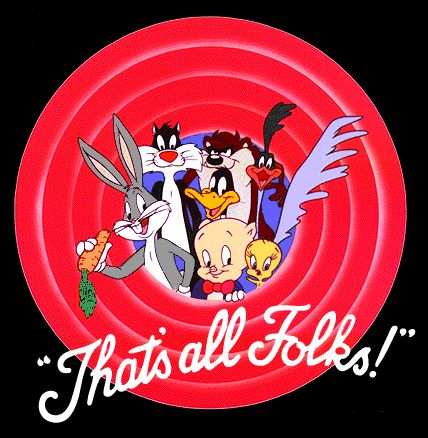

In [ ]:
printstyled("We hope you had fun!🎉🥳🎊";color=:blue)

### For best results, when submitting your FINAL notebook, use the ```Restart Kernel & Clear Output``` option shown below. When the autograder is run, it re-runs all cells from scratch. By clearing your outputs, you erase the (often large) plots in the output too, which makes the file super compact. All of your code remains intact. We promise! For intermediate submissions, you can just hit submit, without clearing your outputs. And if on the final submit you forget to clear your outputs, it should be fine... 

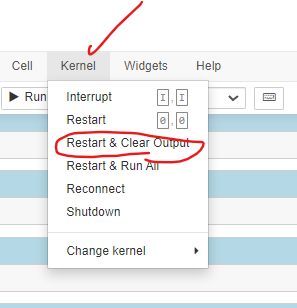